In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

In [9]:
# Calcula a velocidade da roda em função do RPM do motor e da relação de transmissão da cvt
icvt, icx, r, rpm = sp.symbols('icvt icx r rpm')

# Velocidade linear da roda através das relações de transmissão
V = (rpm * np.pi * (2*r)) / (60 * icvt * icx)

V

0.10471975511966*r*rpm/(icvt*icx)

In [11]:
E_V = sp.lambdify([rpm, r, icvt, icx], V)


E_V(3600, 0.2667, 0.81, 7.1)*3.6

62.9380477530441

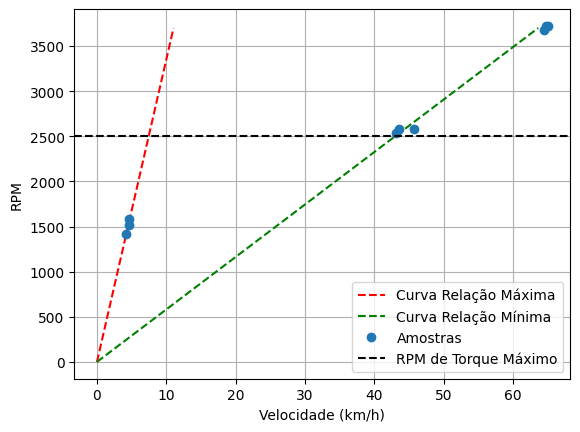

In [40]:
RPM_Motora = [1420,
               1580,
               1521,
               2580,
               2542,
               2580,
               3677,
               3720,
               3723]

RPM_Movida = [298,
               329,
               326,
               3228,
               3050,
               3081,
               4549,
               4576,
               4592]

relacao = [RPM_Motora[i]/RPM_Movida[i] for i in range(len(RPM_Motora))]
Rmax = (relacao[0] + relacao[1] + relacao[2])/3
RPM_Rmax = (RPM_Motora[0] + RPM_Motora[1] + RPM_Motora[2])/3

Rmin = (relacao[3] + relacao[4] + relacao[5])/3
RPM_Rmin = (RPM_Motora[3] + RPM_Motora[4] + RPM_Motora[5])/3

RPM = np.linspace(0, 3700, 361)

plt.plot(E_V(RPM, 0.2667, Rmax, 7.1)*3.6, RPM, 'r--', label='Curva Relação Máxima')
plt.plot(E_V(RPM, 0.2667, Rmin, 7.1)*3.6, RPM, 'g--', label='Curva Relação Mínima')

Amostras = [E_V(RPM_Motora[i], 0.2667, relacao[i], 7.1)*3.6 for i in range(len(RPM_Motora))]
plt.plot(Amostras, RPM_Motora, 'o', label='Amostras')

plt.axhline(2500, color='k', linestyle='--', label='RPM de Torque Máximo')

plt.legend()
plt.xlabel('Velocidade (km/h)')
plt.ylabel('RPM')
plt.grid()